# <span> <font color='3A40A2'>Bayes babes - Knowing the data</font> </span>

Colab to study the data.


---

### Docs

- [Project Group 2 Main doc](https://docs.google.com/document/d/1ZA0-Z-GO-pYg_CeYRGAYFPBJxr1fF4K0PAReS_vPJt0/edit)
- [Laquitaine & Gardner, Neuron, 2018 - *A Switching Observer for Human Perceptual Estimation*](https://pubmed.ncbi.nlm.nih.gov/29290551/)

In [1]:
##importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, requests
from numpy import pi
import seaborn as snss

from utils import getSubjecBasicStats

IMPORTANT: The *utils* file will contain functions and methods to help us and in the same time, keep the colabs clean (less code).

This file is ours 😀

## Getting the data

If you need download the dataset, please run the following cell.

In [2]:
# url = "https://github.com/steevelaquitaine/projInference/raw/gh-pages/data/csv/data01_direction4priors.csv"
# try:
#   RequestAPI = requests.get(url)
# except requests.ConnectionError:
#   print("Failed to download data. Please contact steeve.laquitaine@epfl.ch")
# else:
#   if RequestAPI.status_code != requests.codes.ok:
#     print("Failed to download data. Please contact steeve.laquitaine@epfl.ch")
#   else:
#     with open("data01_direction4priors.csv", "wb") as fid:
#       fid.write(RequestAPI.content)

If you already have the dataset, you can load the *csv* file in your colab space and then do something like this:

```python
data = pd.read_csv("dataset\\data01_direction4priors.csv")
data.head()
```

In [3]:
data = pd.read_csv("dataset\\data01_direction4priors.csv")
data.head()

,trial_index,trial_time,response_arrow_start_angle,motion_direction,motion_coherence,estimate_x,estimate_y,reaction_time,raw_response_time,prior_std,prior_mean,subject_id,experiment_name,experiment_id,session_id,run_id
0,1,0.000000,NaN,225,0.12,-1.749685,-1.785666,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
1,2,2.730730,NaN,225,0.12,-1.819693,-1.714269,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
2,3,4.913950,NaN,235,0.06,-1.562674,-1.951422,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
3,4,6.997296,NaN,225,0.06,-1.601388,-1.919781,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
4,5,9.097130,NaN,215,0.24,-1.639461,-1.887371,NaN,NaN,10,225,1,data01_direction4priors,11,1,1


### Dataset info

`data` contains sessions from 12 human subjects, data from [Laquitaine & Gardner, 2018](https://doi.org/10.1016/j.neuron.2017.12.011).

Subjects had to estimate the direction of stimulus motion directions.

* `data['trial_index']`: trial index
* `data['trial_time']`: time at which trial starts with th e central fixation dot
* `data['response_arrow_start_angle']`: the angle of the response arrow at the start of the response phase.
* `data['motion_direction']`: the stimulus motion direction
* `data['motion_coherence']`: the stimulus motion coherence
* `data['estimate_x']`: x cartesian coordinate of the stimulus motion direction
* `data['estimate_y']`: y cartesian coordinate of the stimulus motion direction
* `data['reaction_time']`: subject's reaction time
* `data['raw_response_time']`: subject response time since the start of the run (of about 200 trials)
* `data['prior_std']`: It is the standard deviation of the statistical distribution (motion direction generative process over trials, which we call "experimental prior") from which we sampled the stimulus motion direction displayed in each trial.
* `data['prior_mean']`: the most frequently displayed motion direction. It is the mean of the statistical distribution (motion direction generative process over trials, which we call "experimental prior") from which we sampled the stimulus motion direction displayed in each trial.
* `data['subject_id']`: the id of the subject for which behavior was recorded.
* `data['experiment_name']`: the name of the experiment. This dataaset only contains the "data01_direction4priors" experiment in which subject underwent a task in which four motion direction were sampled from one of four priors with 10, 40, 60 and 80 degree standard deviations in each block of about 200 trials. The mean of the "experimental prior"  was fixed at 225 deg.
* `data['experiment_id']`: the id of the experiment.
* `data['session_id']`: the id of the session.
* `data['run_id']`: the id of the run.


The complete original dataset is stored in .mat files here: https://data.mendeley.com/datasets/nxkvtrj9ps/1.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83213 entries, 0 to 83212
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trial_index                 83213 non-null  int64  
 1   trial_time                  83213 non-null  float64
 2   response_arrow_start_angle  51363 non-null  float64
 3   motion_direction            83213 non-null  int64  
 4   motion_coherence            83213 non-null  float64
 5   estimate_x                  83210 non-null  float64
 6   estimate_y                  83210 non-null  float64
 7   reaction_time               51358 non-null  float64
 8   raw_response_time           51358 non-null  float64
 9   prior_std                   83213 non-null  int64  
 10  prior_mean                  83213 non-null  int64  
 11  subject_id                  83213 non-null  int64  
 12  experiment_name             83213 non-null  object 
 13  experiment_id               832

The dataset has 83213 rows. Some columns have null or NaN values, like *response_arrow_start_angle*, *reaction_time* and *raw_response_time*.

Counting NaN values.

In [5]:
print(data.isnull().sum())

trial_index                       0
trial_time                        0
response_arrow_start_angle    31850
motion_direction                  0
motion_coherence                  0
estimate_x                        3
estimate_y                        3
reaction_time                 31855
raw_response_time             31855
prior_std                         0
prior_mean                        0
subject_id                        0
experiment_name                   0
experiment_id                     0
session_id                        0
run_id                            0
dtype: int64


#### Numbers of subjects

In [6]:
##Numbers of subjects
n = data['subject_id'].nunique()
print(n)

12


In [7]:
##getting rows with NaN values
nan_rows = data[data.isnull().T.any().T]
nan_rows.head()

,trial_index,trial_time,response_arrow_start_angle,motion_direction,motion_coherence,estimate_x,estimate_y,reaction_time,raw_response_time,prior_std,prior_mean,subject_id,experiment_name,experiment_id,session_id,run_id
0,1,0.000000,NaN,225,0.12,-1.749685,-1.785666,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
1,2,2.730730,NaN,225,0.12,-1.819693,-1.714269,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
2,3,4.913950,NaN,235,0.06,-1.562674,-1.951422,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
3,4,6.997296,NaN,225,0.06,-1.601388,-1.919781,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
4,5,9.097130,NaN,215,0.24,-1.639461,-1.887371,NaN,NaN,10,225,1,data01_direction4priors,11,1,1


#### Counting subject with missing values.

Counting subject_id with missing values in columns *response_arrow_start_angle*, *reaction_time* and *raw_response_time*

In [8]:
##Counting subject_id with missing values in columns
##*response_arrow_start_angle*, *reaction_time* and *raw_response_time*


##what are the subject_id with missing values in *response_arrow_start_angle*
print(data[data['response_arrow_start_angle'].isnull()]['subject_id'].unique())

##what are the subject_id with missing values in *reaction_time*
print(data[data['reaction_time'].isnull()]['subject_id'].unique())

##what are the subject_id with missing values in *raw_response_time*
print(data[data['raw_response_time'].isnull()]['subject_id'].unique())

[1 2 3 4 5 7 8]
[ 1  2  3  4  5  7  8 10 12]
[ 1  2  3  4  5  7  8 10 12]


OK! The dataset has,
- NaN values for [1 2 3 4 5 7 8] in the column *response_arrow_start_angle*
- NaN data for all the subject in the columns *reaction_time* and *raw_response_time*.

#### Counting the amount of NaN values for each subject

In [9]:
##Counting the amount of NaN values for each subject
##for the columns *response_arrow_start_angle*, *reaction_time* and *raw_response_time*
##and storing the results in a dictionary
missing_values = {}
cols = ['response_arrow_start_angle', 'reaction_time', 'raw_response_time']
for subject in data['subject_id'].unique():
    missing_values[subject] = data[data['subject_id'] == subject][cols].isnull().sum()

print(missing_values)

{1: response_arrow_start_angle    5325
reaction_time                 5326
raw_response_time             5326
dtype: int64, 2: response_arrow_start_angle    7877
reaction_time                 7877
raw_response_time             7877
dtype: int64, 3: response_arrow_start_angle    6175
reaction_time                 6175
raw_response_time             6175
dtype: int64, 4: response_arrow_start_angle    4801
reaction_time                 4801
raw_response_time             4801
dtype: int64, 5: response_arrow_start_angle    2552
reaction_time                 2552
raw_response_time             2552
dtype: int64, 6: response_arrow_start_angle    0
reaction_time                 0
raw_response_time             0
dtype: int64, 7: response_arrow_start_angle    2560
reaction_time                 2560
raw_response_time             2560
dtype: int64, 8: response_arrow_start_angle    2560
reaction_time                 2561
raw_response_time             2561
dtype: int64, 9: response_arrow_start_angle   

#### Some stats

In [10]:
interest_columns = ["motion_direction","motion_coherence","reaction_time","raw_response_time","estimate_x", "estimate_y","prior_std","prior_mean"]
data[interest_columns].describe()

,motion_direction,motion_coherence,reaction_time,raw_response_time,estimate_x,estimate_y,prior_std,prior_mean
count,83213.000000,83213.000000,51358.000000,51358.000000,83210.000000,83210.000000,83213.000000,83213.0
mean,219.320479,0.110151,1.348336,312.565360,-1.084458,-1.138415,46.536238,225.0
std,53.909092,0.063328,0.434855,181.609425,1.347366,1.400933,29.571143,0.0
min,5.000000,0.060000,-0.018289,1.986980,-2.500000,-2.500000,10.000000,225.0
25%,205.000000,0.060000,1.033973,156.506217,-2.040637,-2.124885,20.000000,225.0
50%,225.000000,0.120000,1.288288,310.609727,-1.608466,-1.673396,40.000000,225.0
75%,245.000000,0.120000,1.586622,465.067239,-0.532460,-0.728998,80.000000,225.0
max,355.000000,0.240000,4.784302,783.474811,2.500000,2.500000,80.000000,225.0


In [11]:
getSubjecBasicStats(data, 1, interest_columns)##subject 1

,motion_direction,motion_coherence,reaction_time,raw_response_time,estimate_x,estimate_y,prior_std,prior_mean
count,8562.000000,8562.000000,3236.000000,3236.000000,8562.000000,8562.000000,8562.000000,8562.0
mean,220.722962,0.109671,1.514560,331.363714,-1.307532,-1.213003,46.384022,225.0
std,51.624894,0.062966,0.473540,190.648428,1.240129,1.237506,29.579953,0.0
min,5.000000,0.060000,0.564553,2.561262,-2.499994,-2.499999,10.000000,225.0
25%,205.000000,0.060000,1.165415,167.707468,-2.149526,-2.027647,20.000000,225.0
50%,225.000000,0.120000,1.464248,329.981391,-1.784481,-1.602688,40.000000,225.0
75%,245.000000,0.120000,1.808223,494.140562,-0.894598,-0.843608,80.000000,225.0
max,355.000000,0.240000,3.832662,733.082057,2.499955,2.499999,80.000000,225.0


In [23]:
getSubjecBasicStats(data, 8, interest_columns) ##subject 2

,motion_direction,motion_coherence,reaction_time,raw_response_time,estimate_x,estimate_y,prior_std,prior_mean
count,5797.000000,5797.000000,3236.000000,3236.000000,5797.000000,5797.000000,5797.000000,5797.0
mean,219.605831,0.110043,1.299345,307.622092,-1.002635,-0.967123,46.801794,225.0
std,53.643354,0.063257,0.471169,177.954445,1.466119,1.469910,29.675916,0.0
min,5.000000,0.060000,0.002657,2.023966,-2.499999,-2.500000,10.000000,225.0
25%,205.000000,0.060000,0.963183,154.535982,-2.149526,-2.124885,20.000000,225.0
50%,225.000000,0.120000,1.196800,307.070720,-1.599852,-1.444230,40.000000,225.0
75%,245.000000,0.120000,1.539945,458.661451,-0.187070,-0.179917,80.000000,225.0
max,355.000000,0.240000,4.784302,717.537509,2.499995,2.500000,80.000000,225.0


In [13]:
##pivote table with some data per subject
cols = ["reaction_time","motion_direction","motion_coherence"]
pivot_table = data.pivot_table(index="subject_id", values=cols, aggfunc=("mean","std","median"))
pivot_table

motion_coherence                  motion_direction         \
                       mean median       std             mean median   
subject_id                                                             
1                  0.109671   0.12  0.062966       220.722962  225.0   
2                  0.108887   0.12  0.062342       223.098261  225.0   
3                  0.109590   0.12  0.062903       220.995538  225.0   
4                  0.108765   0.12  0.062274       223.185795  225.0   
5                  0.110050   0.12  0.063234       219.598376  225.0   
6                  0.110936   0.12  0.063919       216.992586  225.0   
7                  0.110043   0.12  0.063257       219.605831  225.0   
8                  0.110043   0.12  0.063257       219.605831  225.0   
9                  0.110936   0.12  0.063918       216.992586  225.0   
10                 0.110978   0.12  0.063961       217.138958  225.0   
11                 0.110936   0.12  0.063919       216.992586  225.0   
12                 0.110936   0.12  0.063919       216.992586  225.0   

                      reaction_time                      
                  std          mean    median       std  
subject_id                                               
1           51.624894      1.514560  1.464248  0.473540  
2           46.701390           NaN       NaN       NaN  
3           50.731104      1.497354  1.441107  0.426724  
4           46.732167           NaN       NaN       NaN  
5           54.012130      1.119653  1.081138  0.289499  
6           57.608262      1.333163  1.274959  0.359714  
7           53.643354      1.581867  1.510679  0.553160  
8           53.643354      1.299345  1.196800  0.471169  
9           57.607785      1.354904  1.296655  0.407109  
10          57.241121      1.184886  1.122335  0.347140  
11          57.608897      1.259070  1.196795  0.423505  
12          57.608897      1.463601  1.435616  0.448964

#### Some basic correlations

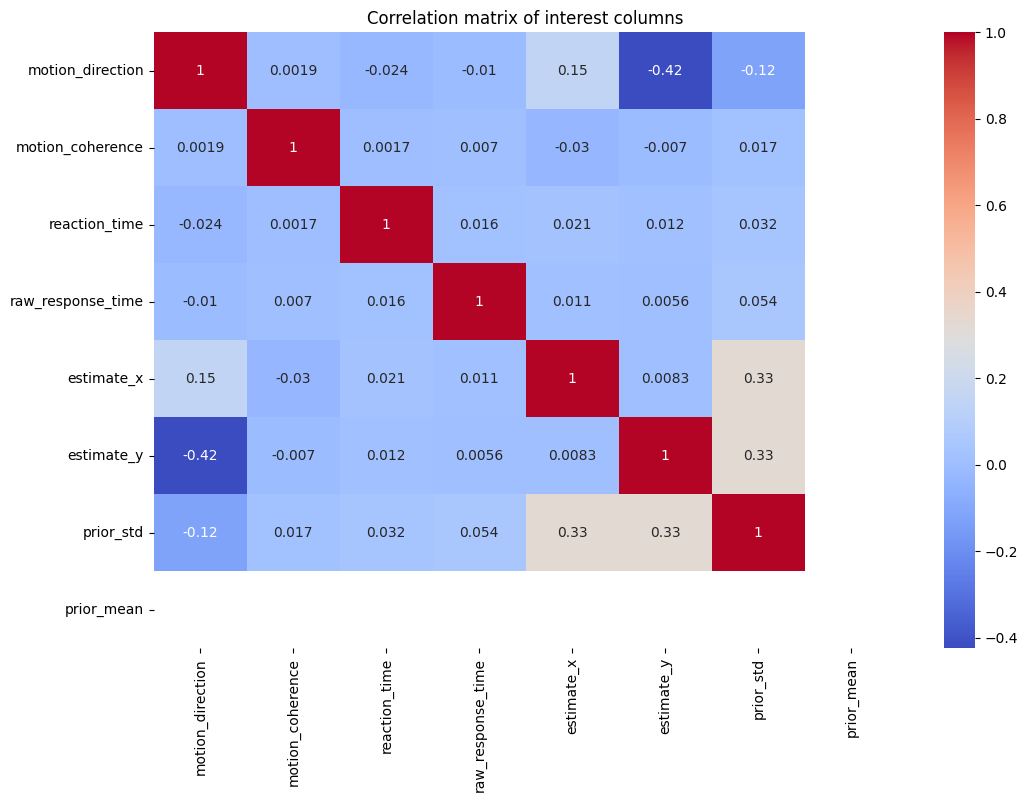

In [14]:
##make a correlation matrix of interest_columns
corr_matrix = data[interest_columns].corr()

##plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12,8))
snss.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of interest columns")
plt.show()

In [15]:
##gruping data for subject_id and counting the number of trials
grouped_data = data.groupby("subject_id").size()
grouped_data

subject_id
1     8562
2     7877
3     9412
4     4801
5     5789
6     7553
7     5797
8     5797
9     8632
10    6045
11    6474
12    6474
dtype: int64